In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

movies_info = pd.read_csv('movie_Details.csv')
movies_info.head()

,movieTitle,director,actorNamesList,movieTypesList,movieRateList,movieYearList
0,No Time to Die,Cary Joji Fukunaga,"['Daniel Craig', 'Ana de Armas', 'Rami Malek',...","['Action', 'Adventure', 'Thriller']",7.6,2021
1,Dune,Denis Villeneuve,"['Timothée Chalamet', 'Rebecca Ferguson', 'Zen...","['Action', 'Adventure', 'Drama']",8.3,2021
2,Halloween Kills,David Gordon Green,"['Jamie Lee Curtis', 'Judy Greer', 'Andi Matic...","['Horror', 'Thriller']",5.8,2021
3,The Last Duel,Ridley Scott,"['Matt Damon', 'Adam Driver', 'Jodie Comer', '...","['Action', 'Drama', 'History']",7.7,2021
4,Venom: Let There Be Carnage,Andy Serkis,"['Tom Hardy', 'Woody Harrelson', 'Michelle Wil...","['Action', 'Adventure', 'Sci-Fi']",6.4,2021


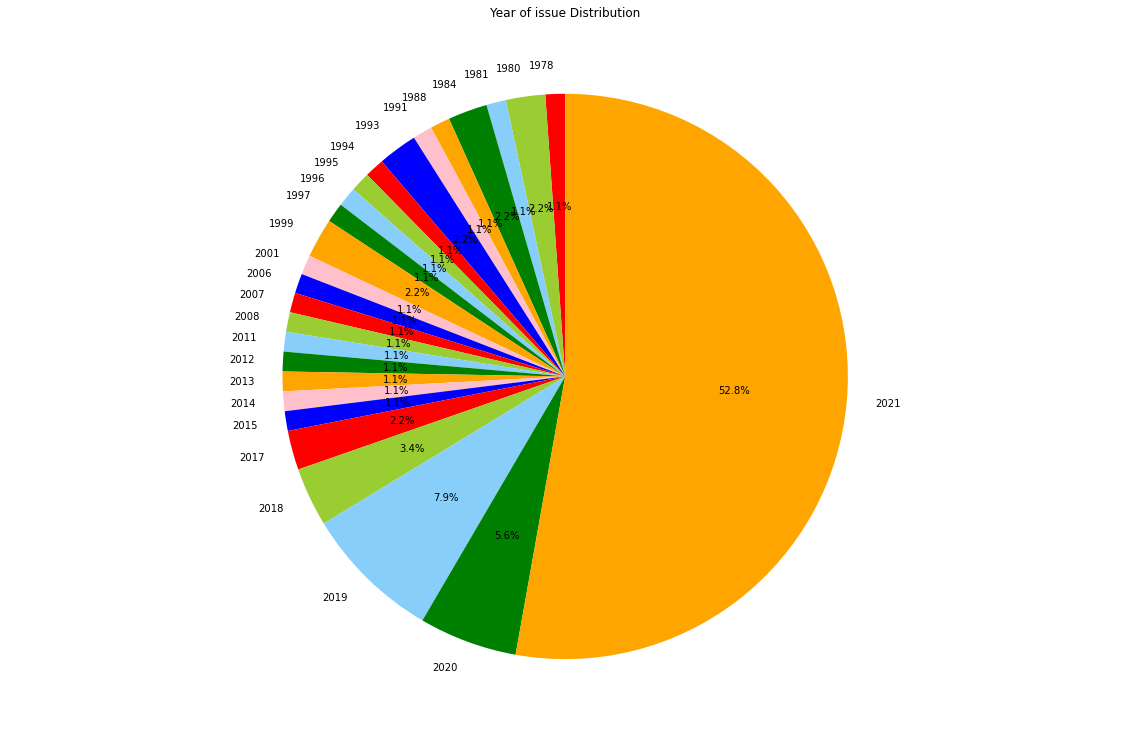

In [2]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

from matplotlib import pyplot as plt 
 

plt.figure(figsize=(20,13))

colors = ['red','yellowgreen','lightskyblue','green','orange','pink','blue']
sums = movies_info.groupby(movies_info["movieYearList"])["movieYearList"].count()
axis('equal');
plt.pie(sums,autopct='%1.1f%%', labels=sums.index,colors=colors,labeldistance = 1.1,shadow = False,startangle = 90,pctdistance = 0.6);
plt.title('Year of issue Distribution')
plt.show()

In [3]:
# look for the director who directs the most movies on the list of IMDb Most Popular Movies
directors = movies_info['director'].value_counts()
directors.index[0]

'Wes Craven'

In [4]:
# look for these movies
director_movies = movies_info[movies_info['director'] == directors.index[0]]['movieTitle']
director_movies

18                       Scream
48    A Nightmare on Elm Street
69                     Scream 4
Name: movieTitle, dtype: object

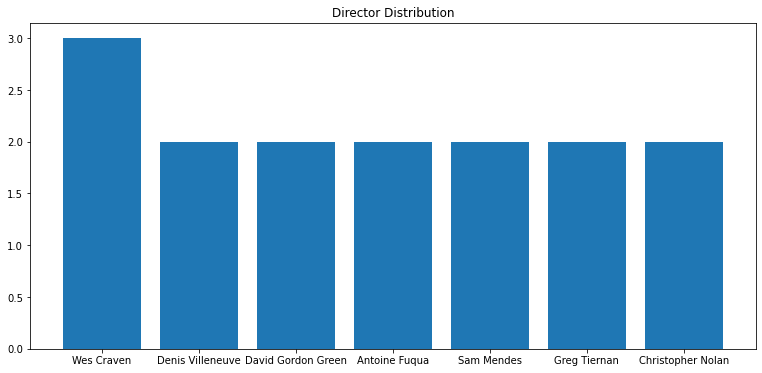

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
dirts = {} # actor's names and the number of movie they acted
for directors in movies_info['director']:
    dirts[directors] = dirts.get(directors,0) + 1

top_dirts = {}
for i in sorted(dirts.items(), key=lambda x:x[1], reverse=True):
    if i[1] > 1: 
        top_dirts[i[0]] = i[1]

plt.figure(figsize=(13,6))
plt.bar(*zip(*top_dirts.items()))
plt.title('Director Distribution')
plt.show()

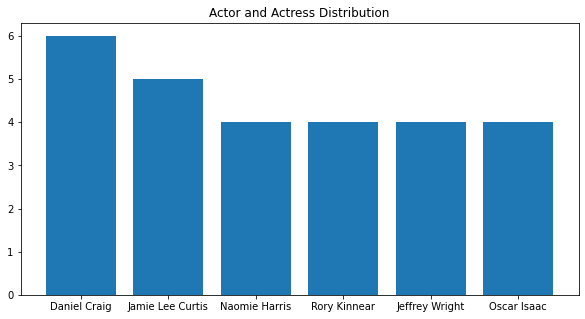

In [6]:
# look for the actors who acts more than 3 movies on the list of IMDb Most Popular Movies
acts = {} # actor's names and the number of movie they acted
for actors in movies_info['actorNamesList']:
    actors = literal_eval(actors)
    for name in actors:
        acts[name] = acts.get(name,0) + 1

top_acts = {}
for i in sorted(acts.items(), key=lambda x:x[1], reverse=True):
    if i[1] > 3: 
        top_acts[i[0]] = i[1]

plt.figure(figsize=(10,5))
plt.bar(*zip(*top_acts.items()))
plt.title('Actor and Actress Distribution')
plt.show()

In [7]:
top_acts_name = top_acts.keys()
movies = {}
for i in range(len(movies_info)):
    acts = movies_info['actorNamesList'][i]
    for j in literal_eval(acts):
        if j in list(top_acts_name):
            movies.setdefault(j,[]).append(movies_info['movieTitle'][i])

for i in sorted(movies, key=lambda x:len(movies[x]), reverse=True):
    print(f'{i}: {movies[i]}')

Daniel Craig: ['No Time to Die', 'Spectre', 'Casino Royale', 'Skyfall', 'Quantum of Solace', 'Knives Out']
Jamie Lee Curtis: ['Halloween Kills', 'Halloween', 'Halloween', 'Knives Out', 'Halloween II']
Naomie Harris: ['No Time to Die', 'Venom: Let There Be Carnage', 'Spectre', 'Skyfall']
Rory Kinnear: ['No Time to Die', 'Spectre', 'Skyfall', 'Quantum of Solace']
Jeffrey Wright: ['No Time to Die', 'Casino Royale', 'The French Dispatch', 'Quantum of Solace']
Oscar Isaac: ['Dune', 'The Addams Family 2', 'The Addams Family', 'The Card Counter']


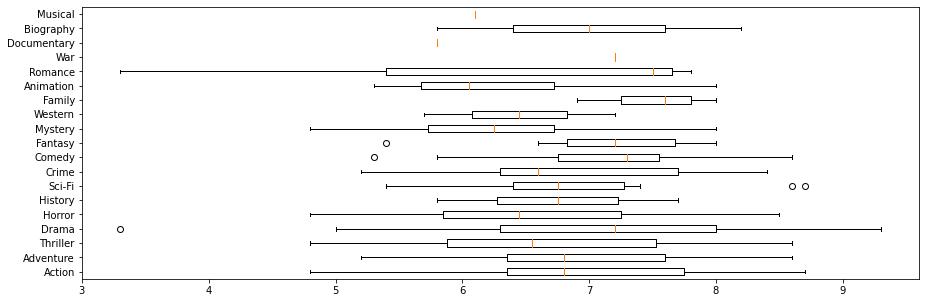

In [8]:
import matplotlib.pyplot as plt

movie_types = movies_info['movieTypesList']
movie_type_rank = {}
movie_type_fq = {}
for i in range(len(movies_info)):
    movie_type = movies_info['movieTypesList'][i]
    for j in literal_eval(movie_type):
        movie_type_rank.setdefault(j,[]).append(movies_info['movieRateList'][i])
        movie_type_fq[j] = movie_type_fq.get(j,0) + 1
        
plt.figure(figsize=(15,5))
plt.boxplot(movie_type_rank.values(),labels=movie_type_rank.keys(),vert=False)
plt.show()


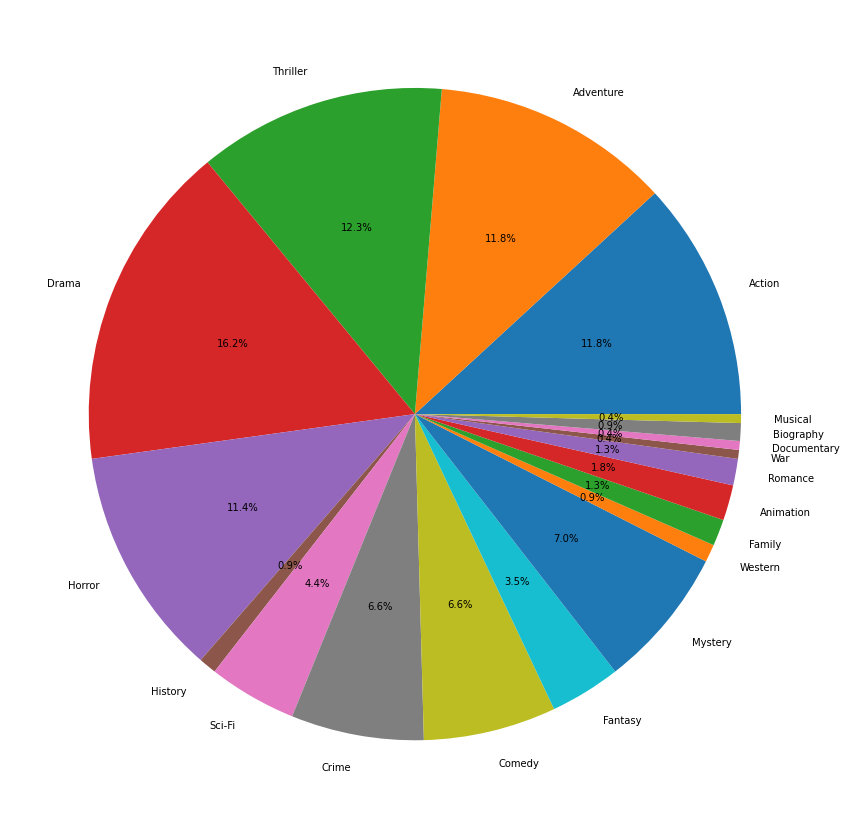

In [9]:
fig = plt.figure(figsize=(20,15))
plt.pie(movie_type_fq.values(), labels=movie_type_fq.keys(),autopct='%1.1f%%')

plt.show()

In [10]:
movies_review = pd.read_csv('movie_reviews_preprocessed.csv')
movies_review.head()

,review_content,review_label
0,happening movie making destroy every classic w...,0
1,action scene take away especially new female a...,0
2,complete rubbish pc bond james bond ian flemin...,0
3,ruined terminator come time bond endure hour w...,0
4,film far far far long could comfortably left m...,0


In [11]:
import re
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(label):
    reviews = movies_review[movies_review['review_label'] == label].review_content
    token = []
    for review in reviews:
        tokens = word_tokenize(str(review))
        token.extend(tokens)
    pos_tags = nltk.pos_tag(token,tagset='universal')

    adj_words = [word for word,tag in pos_tags if tag=='ADJ']
    adj_words = ' '.join(adj_words)
    wordcloud = WordCloud(width = 800,
                         height = 600,
                         margin = 2,
                         background_color = 'white',
                         ).generate(adj_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


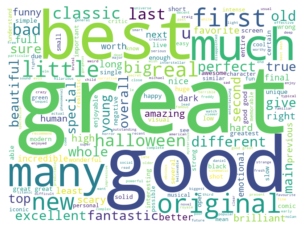

In [12]:
show_wordcloud(1)

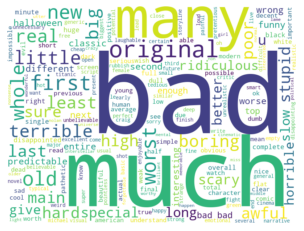

In [13]:
show_wordcloud(0)